In [67]:
#!pip install pandas_profiling

In [68]:
#!pip install sweetviz

In [8]:
#load the libraries
import pandas as pd
import numpy as np
import pandas_profiling as pp
import sweetviz as sv

In [9]:
data1=pd.read_csv("D:\DATA SCIENCE\Data sets\day12\data_clean.csv")

In [10]:
data1.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,NaN,NaN,14.3,56,5,5,2010,56,S


In [11]:
data1.tail()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
153,154,41.0,190.0,7.4,67,5,1,2010,67,C
154,155,30.0,193.0,6.9,70,9,26,2010,70,PS
155,156,NaN,145.0,13.2,77,9,27,2010,77,S
156,157,14.0,191.0,14.3,75,9,28,2010,75,S
157,158,18.0,131.0,8.0,76,9,29,2010,76,C


In [12]:
#data sructure
type(data1)
data1.shape

(158, 10)

In [13]:
#data types
data1.dtypes

#check for type object

Unnamed: 0      int64
Ozone         float64
Solar.R       float64
Wind          float64
Temp C         object
Month          object
Day             int64
Year            int64
Temp            int64
Weather        object
dtype: object

## Data type conversion

In [14]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  158 non-null    int64  
 1   Ozone       120 non-null    float64
 2   Solar.R     151 non-null    float64
 3   Wind        158 non-null    float64
 4   Temp C      158 non-null    object 
 5   Month       158 non-null    object 
 6   Day         158 non-null    int64  
 7   Year        158 non-null    int64  
 8   Temp        158 non-null    int64  
 9   Weather     155 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 12.5+ KB


In [15]:
data1

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,NaN,NaN,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...,...
153,154,41.0,190.0,7.4,67,5,1,2010,67,C
154,155,30.0,193.0,6.9,70,9,26,2010,70,PS
155,156,NaN,145.0,13.2,77,9,27,2010,77,S
156,157,14.0,191.0,14.3,75,9,28,2010,75,S


In [16]:
#get rid of unnamed column
data2=data1.iloc[:,1:]

In [17]:
data2

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,67,5,1,2010,67,S
1,36.0,118.0,8.0,72,5,2,2010,72,C
2,12.0,149.0,12.6,74,5,3,2010,74,PS
3,18.0,313.0,11.5,62,5,4,2010,62,S
4,NaN,NaN,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,67,5,1,2010,67,C
154,30.0,193.0,6.9,70,9,26,2010,70,PS
155,NaN,145.0,13.2,77,9,27,2010,77,S
156,14.0,191.0,14.3,75,9,28,2010,75,S


In [18]:
#The method .copy() is use here so that any change mode in new dataframe dont get reflected in the original one
data=data2.copy()

In [19]:
data['Month']=pd.to_numeric(data['Month'],errors='coerce')
data['Temp C']=pd.to_numeric(data['Temp C'],errors='coerce')# coerce will introduce NA values for non numeric data in the columns
data['Weather']=data['Weather'].astype('category')#data['Wind']=data['Wind'].astype('int64')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Ozone    120 non-null    float64 
 1   Solar.R  151 non-null    float64 
 2   Wind     158 non-null    float64 
 3   Temp C   157 non-null    float64 
 4   Month    157 non-null    float64 
 5   Day      158 non-null    int64   
 6   Year     158 non-null    int64   
 7   Temp     158 non-null    int64   
 8   Weather  155 non-null    category
dtypes: category(1), float64(5), int64(3)
memory usage: 10.3 KB


## Duplicates

In [21]:
#count duplicate rows
data[data.duplicated()].shape

(1, 9)

In [22]:
#print the dulpicated row
data[data.duplicated()]

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
156,14.0,191.0,14.3,75.0,9.0,28,2010,75,S


In [23]:
data_clean1=data.drop_duplicates()

In [24]:
data_clean1.shape

(157, 9)

## Drop columns

In [25]:
data_clean2=data_clean1.drop('Temp C',axis=1)

In [26]:
data_clean2

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S


## Rename the column

In [27]:
#rename the solar column
data_clean3=data_clean2.rename({'Solar.R':'Solar'},axis=1)

## Outliers detection

<AxesSubplot:>

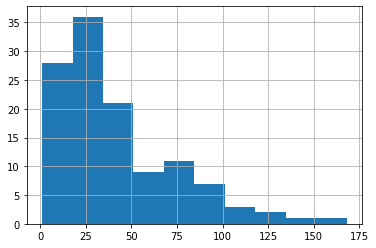

In [28]:
#histogram of ozone
data_clean3['Ozone'].hist()

<AxesSubplot:>

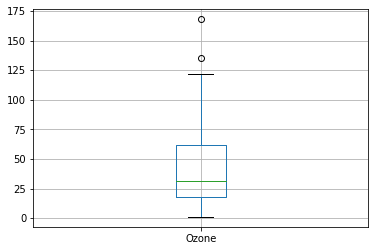

In [29]:
data_clean3.boxplot(column='Ozone')

In [30]:
data_clean3

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S


<AxesSubplot:>

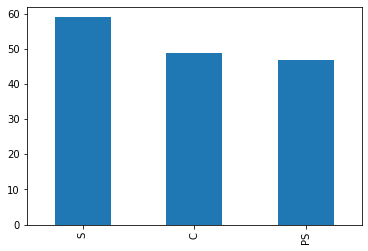

In [31]:
data['Weather'].value_counts().plot.bar()

## Missing value and imputations

<AxesSubplot:>

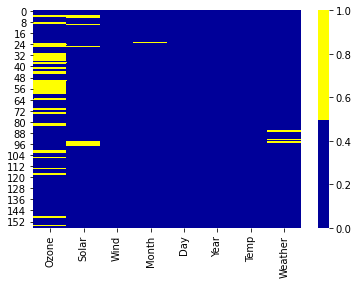

In [32]:
import seaborn as sns
cols=data_clean3.columns
colours=['#000099','#ffff00']#specify the colors yellow is mipssing blue is not missing
sns.heatmap(data_clean3[cols].isnull(),cmap=sns.color_palette(colours))

In [33]:
data_clean3[data_clean3.isnull().any(axis=1)].head()

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
4,NaN,NaN,14.3,5.0,5,2010,56,S
5,28.0,NaN,14.9,5.0,6,2010,66,C
9,NaN,194.0,8.6,5.0,10,2010,69,S
10,7.0,NaN,6.9,5.0,11,2010,74,C
23,32.0,92.0,12.0,NaN,24,2010,61,C


In [34]:
data_clean3.isnull().sum()

Ozone      38
Solar       7
Wind        0
Month       1
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

In [35]:
#mean imputation
mean=data_clean3['Ozone'].mean()
print(mean)

41.81512605042017


In [36]:
data_clean3['Ozone']=data_clean3['Ozone'].fillna(mean)

In [37]:
data_clean3.head(10)

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.000000,190.0,7.4,5.0,1,2010,67,S
1,36.000000,118.0,8.0,5.0,2,2010,72,C
2,12.000000,149.0,12.6,5.0,3,2010,74,PS
3,18.000000,313.0,11.5,5.0,4,2010,62,S
4,41.815126,NaN,14.3,5.0,5,2010,56,S
5,28.000000,NaN,14.9,5.0,6,2010,66,C
6,23.000000,299.0,8.6,5.0,7,2010,65,PS
7,19.000000,99.0,13.8,5.0,8,2010,59,C
8,8.000000,19.0,20.1,5.0,9,2010,61,PS
9,41.815126,194.0,8.6,5.0,10,2010,69,S


In [38]:
data_clean3['Solar']=data_clean3['Solar'].fillna(data_clean3['Solar'].mean()) 

In [39]:
data_clean3['Month']=data_clean3['Month'].fillna(data_clean3['Month'].mean())

In [40]:
data_clean3.head(10)

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.000000,190.000000,7.4,5.0,1,2010,67,S
1,36.000000,118.000000,8.0,5.0,2,2010,72,C
2,12.000000,149.000000,12.6,5.0,3,2010,74,PS
3,18.000000,313.000000,11.5,5.0,4,2010,62,S
4,41.815126,185.366667,14.3,5.0,5,2010,56,S
5,28.000000,185.366667,14.9,5.0,6,2010,66,C
6,23.000000,299.000000,8.6,5.0,7,2010,65,PS
7,19.000000,99.000000,13.8,5.0,8,2010,59,C
8,8.000000,19.000000,20.1,5.0,9,2010,61,PS
9,41.815126,194.000000,8.6,5.0,10,2010,69,S


In [41]:
#missing value imputation for categorical variable
#get the object column
obj_columns=data_clean3[['Weather']]

In [42]:
obj_columns.isnull().sum()

Weather    3
dtype: int64

In [43]:
#missing value imputation for categorical variable
obj_columns=obj_columns.fillna(obj_columns.mode().iloc[0])

In [44]:
obj_columns

,Weather
0,S
1,C
2,PS
3,S
4,S
...,...
152,S
153,C
154,PS
155,S


In [45]:
obj_columns.isnull().sum()

Weather    0
dtype: int64

In [46]:
data_clean3

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.000000,190.000000,7.4,5.0,1,2010,67,S
1,36.000000,118.000000,8.0,5.0,2,2010,72,C
2,12.000000,149.000000,12.6,5.0,3,2010,74,PS
3,18.000000,313.000000,11.5,5.0,4,2010,62,S
4,41.815126,185.366667,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.000000,223.000000,11.5,9.0,30,2010,68,S
153,41.000000,190.000000,7.4,5.0,1,2010,67,C
154,30.000000,193.000000,6.9,9.0,26,2010,70,PS
155,41.815126,145.000000,13.2,9.0,27,2010,77,S


In [47]:
data_clean3.shape

(157, 8)

In [48]:
obj_columns.shape

(157, 1)

In [49]:
#drop the 'wearther column(with NAN's) in order to append the impute column to origignal dataframe'
data_clean4=data_clean3.iloc[:,:7]

In [50]:
data_clean4.head()

,Ozone,Solar,Wind,Month,Day,Year,Temp
0,41.000000,190.000000,7.4,5.0,1,2010,67
1,36.000000,118.000000,8.0,5.0,2,2010,72
2,12.000000,149.000000,12.6,5.0,3,2010,74
3,18.000000,313.000000,11.5,5.0,4,2010,62
4,41.815126,185.366667,14.3,5.0,5,2010,56


In [51]:
#Join the data set with imputed object dataset
data_clean4=pd.concat([data_clean3,obj_columns],axis=1)

In [52]:
data_clean4.shape

(157, 9)

In [53]:
data_clean4.head()

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather,Weather
0,41.000000,190.000000,7.4,5.0,1,2010,67,S,S
1,36.000000,118.000000,8.0,5.0,2,2010,72,C,C
2,12.000000,149.000000,12.6,5.0,3,2010,74,PS,PS
3,18.000000,313.000000,11.5,5.0,4,2010,62,S,S
4,41.815126,185.366667,14.3,5.0,5,2010,56,S,S


## Scatter plot and Correlation analysis

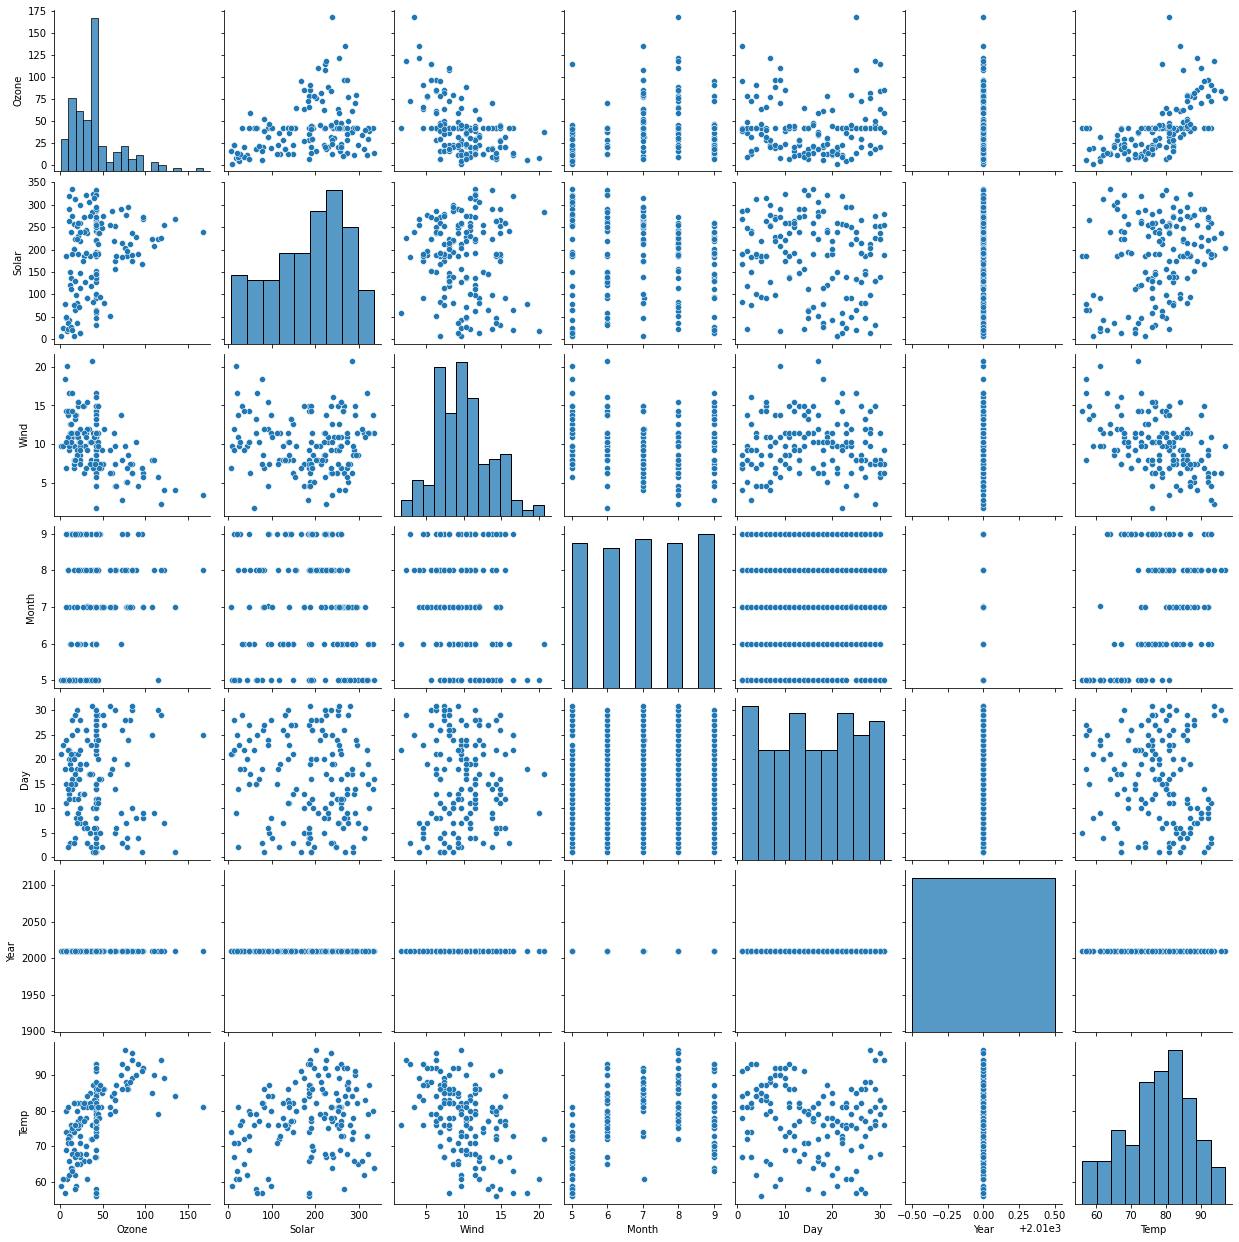

In [54]:
#seaborn visualization libratu
import seaborn as sns
#creat default pair plot
sns.pairplot(data_clean3)

In [55]:
data_clean3.corr()

,Ozone,Solar,Wind,Month,Day,Year,Temp
Ozone,1.000000,0.304559,-0.520004,0.132809,-0.021916,NaN,0.606500
Solar,0.304559,1.000000,-0.055874,-0.090564,-0.151007,NaN,0.260677
Wind,-0.520004,-0.055874,1.000000,-0.166029,0.029900,NaN,-0.441228
Month,0.132809,-0.090564,-0.166029,1.000000,0.049924,NaN,0.394420
Day,-0.021916,-0.151007,0.029900,0.049924,1.000000,NaN,-0.122787
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temp,0.606500,0.260677,-0.441228,0.394420,-0.122787,NaN,1.000000


## Transformation

In [56]:
#dummy variable
data_clean4=pd.get_dummies(data,columns=['Weather'])

In [57]:
data_clean4

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather_C,Weather_PS,Weather_S
0,41.0,190.0,7.4,67.0,5.0,1,2010,67,0,0,1
1,36.0,118.0,8.0,72.0,5.0,2,2010,72,1,0,0
2,12.0,149.0,12.6,74.0,5.0,3,2010,74,0,1,0
3,18.0,313.0,11.5,62.0,5.0,4,2010,62,0,0,1
4,NaN,NaN,14.3,56.0,5.0,5,2010,56,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,67.0,5.0,1,2010,67,1,0,0
154,30.0,193.0,6.9,70.0,9.0,26,2010,70,0,1,0
155,NaN,145.0,13.2,77.0,9.0,27,2010,77,0,0,1
156,14.0,191.0,14.3,75.0,9.0,28,2010,75,0,0,1


In [58]:
data_clean4=data_clean4.dropna()

## Normalization of data

In [59]:
#Normalization of the data
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [60]:
data_clean4.values

array([[ 41. , 190. ,   7.4, ...,   0. ,   0. ,   1. ],
       [ 36. , 118. ,   8. , ...,   1. ,   0. ,   0. ],
       [ 12. , 149. ,  12.6, ...,   0. ,   1. ,   0. ],
       ...,
       [ 30. , 193. ,   6.9, ...,   0. ,   1. ,   0. ],
       [ 14. , 191. ,  14.3, ...,   0. ,   0. ,   1. ],
       [ 18. , 131. ,   8. , ...,   1. ,   0. ,   0. ]])

In [61]:
array=data_clean4.values
scaler=MinMaxScaler(feature_range=(0,1))
rescaledX=scaler.fit_transform(array[:,:5])

#transform data
set_printoptions(precision=2)
print(rescaledX[:5,:])

[[0.24 0.56 0.28 0.25 0.  ]
 [0.21 0.34 0.31 0.38 0.  ]
 [0.07 0.43 0.56 0.43 0.  ]
 [0.1  0.94 0.5  0.12 0.  ]
 [0.13 0.89 0.34 0.2  0.  ]]


## Standardize data

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
array=data_clean4.values
scaler=StandardScaler().fit(array)
rescaledX=scaler.transform(array)

#summerize transform data
set_printoptions(precision=2)
print(rescaledX[:5,:])

[[-0.02  0.05 -0.71 -1.15 -1.53 -1.7   0.   -1.15 -0.64 -0.68  1.28]
 [-0.17 -0.75 -0.54 -0.62 -1.53 -1.59  0.   -0.62  1.57 -0.68 -0.78]
 [-0.9  -0.41  0.77 -0.4  -1.53 -1.48  0.   -0.4  -0.64  1.47 -0.78]
 [-0.72  1.43  0.45 -1.69 -1.53 -1.36  0.   -1.69 -0.64 -0.68  1.28]
 [-0.57  1.27 -0.37 -1.37 -1.53 -1.02  0.   -1.37 -0.64  1.47 -0.78]]



## Speed up the EDA process

In [64]:
data1.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,NaN,NaN,14.3,56,5,5,2010,56,S


In [65]:
EDA_report=pp.ProfileReport(data1)
EDA_report.to_file(output_file='data1.html')

In [66]:
sweet_report=sv.analyze(data)
sweet_report.show_html("clean_data4.html")


Report clean_data4.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
